<a href="https://colab.research.google.com/github/Anjali001/GRIP_Tasks/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Using Scikit Learn**

Regression is one of the algorithms for Supervised Machine Learning.

In this approach , it is assumed that the dependent and independent variable are linearly related.






---


### **Author:**
Anjali Pal

Data Science and Analytics Intern 

The Sparks Foundation


---



### Problem Statement:
We want to predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.

Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a
day?



### Step 1 : Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2 : Read Data

In [ ]:
address = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(address)
data.head() #To view first five elements of dataframe


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step 3: Visualize 

To ensure whether variables have a linear relationship or not.





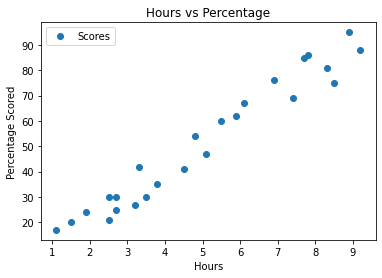

In [ ]:
# Both Scatter and Plot function give same result but Plot is generally faster than scatter 
# See more info at https://pythonmatplotlibtips.blogspot.com/2018/01/compare-pltplot-and-pltscatter-in-speed-python-matplotlib.html 
# plt.scatter(x=data["Hours"], y=data["Scores"])

data.plot(x="Hours",y="Scores",style='o')
plt.title('Hours vs Percentage')  
plt.xlabel("Hours")
plt.ylabel("Percentage Scored")
plt.show()



**From the above , we can see that Percentage Scored and Hours are linearly related and hence Linear Regression can be used to predict values of Percentage (Dependent Variable or Y) based on Hours (Independent Variable or X).**

### Step 4: Preparing data
We need to divide the data in Output( Percentage Scored) and Input (Hours). 

In [ ]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

Now, we divide data using train test split into 4 parts which are as follows:

X_train will be Hours which are used in Training the algorithm

Y_train will be Scores which are used in Training the algorithm

X_test will be Hours which are used in testing the algorithm

Y_test will be Scores which are used in testing the algorithm

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
#If random_sate is not set to 0,with every exceution of same program , all metrics will change rndomly because of random selection of data with each execution

### Step 5:Training the Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

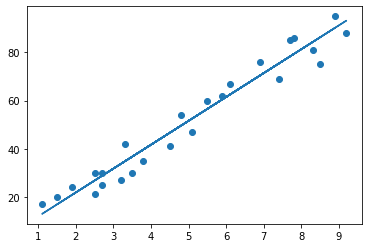

In [ ]:
#Plotting Regression Line
line = regressor.coef_ * X + regressor.intercept_ # This is same as linear regression equation Y = AX +B 
#print(line)
# line variable contains predictions of Percentage Scored for whole dataset given based on Hours from the Linear Regression Technique 
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

### Step 6: Testing

In [ ]:
print(f'Testing data is :\n{X_test}') # Testing data of independent varible
Y_pred = regressor.predict(X_test) # Predicting the scores
print(f'Predicted Scores are : {Y_pred}')


Testing data is :
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicted Scores are : [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Step 7 : Evaluating The model

In [ ]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
from sklearn import metrics 
r2= sklearn.metrics.r2_score(Y_test, Y_pred)
mae = sklearn.metrics.mean_absolute_error(Y_test, Y_pred)

In [ ]:
print(f'R squared is : {np.round(r2*100,2)}%')

R squared is : 94.55%


R squared also known as coefficient of determination is a statistical measure that represents proportion of variance in dependant variable explained by independent variable. It is between 0 (worst model) to 1 (best model).

That is , R^2 = 0.9455 implies that 94.55% of variance in Y (Scores) can be explained by X (Hours).

In [ ]:
print(f'Mean Absolute Error is : {mae}')

Mean Absolute Error is : 4.183859899002982


The mean absolute error is the mean of the absolute values of the differences between the forecasted values and the actual values.

Here, it signifies that on average , we can expect our predictions to have an error of 4.18 units. 

### Step 8: Predicting Own data (Given in Question)

In [ ]:
hour = [[9.25]]
score_pred = regressor.predict(hour)
print(f'The predicted score if a student studies for 9.25 hrs in a day will be {score_pred[0].round(0)} ')



The predicted score if a student studies for 9.25 hrs in a day will be 94.0 


---



*This task is done as part of Data Science and Analytics Internship at GRIP: The Sparks Foundation*

---
